In [12]:
import math

SCALE_FACTORS = {
    "PREC": 3.72,  # Precedentedness
    "FLEX": 2.03,  # Development Flexibility
    "RESL": 2.83,  # Architecture/Risk Resolution
    "TEAM": 3.29,  # Team Cohesion
    "PMAT": 4.68   # Process Maturity
}

# Значення множників трудомісткості для детальної оцінки
DETAILED_MULTIPLIERS = {
    "ACAP": 0.85,  # Analyst Capability
    "AEXP": 0.88,  # Applications Experience
    "PCAP": 0.88,  # Programmer Capability
    "PCON": 1.00,  # Personnel Continuity
    "PEXP": 1.00,  # Platform Experience
    "LTEX": 0.91,  # Language and Tool Experience
    "RELY": 1.10,  # Required Software Reliability
    "DATA": 1.00,  # Database Size
    "CPLX": 1.34,  # Product Complexity
    "RUSE": 1.00,  # Required Reusability
    "DOCU": 1.00,  # Documentation Match to Lifecycle Needs
    "TIME": 1.11,  # Execution Time Constraint
    "STOR": 1.00,  # Main Storage Constraint
    "PVOL": 1.15,  # Platform Volatility
    "TOOL": 0.90,  # Use of Software Tools
    "SITE": 0.93,  # Multisite Development
    "SCED": 1.00   # Required Development Schedule
}

PRELIMINARY_MULTIPLIERS = {
    "PERS": 0.83,  # Personnel Capability
    "PREX": 0.87,  # Personnel Experience
    "RCPX": 1.91,  # Product Reliability and Complexity
    "RUSE": 1.00,  # Required Reusability
    "PDIF": 1.29,  # Platform Difficulty
    "FCIL": 0.87,  # Facilities
    "SCED": 1.00   # Required Development Schedule
}

B = 0.91
C = 3.67
D = 0.28

def calculate_estimates(
    size_kloc: float,
    em_values: dict[str, float],
    detailed: bool
) -> tuple[float, float]:
    A = 2.45 if detailed else 2.94
    sf_sum = sum(SCALE_FACTORS.values())
    E = B + 0.01 * sf_sum
    eaf = math.prod(em_values.values())
    pm = eaf * A * (size_kloc ** E)
    tm = C * (pm ** (D + 0.2 * (E - B)))    
    return pm, tm

In [13]:
from typing import Iterable
import matplotlib.pyplot as plt

def plot_graphs(
    prelimitary: Iterable[float],
    detailed: Iterable[float],
    klocs: Iterable[float],
    y_label: str
) -> None:
        plt.plot(klocs, prelimitary, label=f'prelimitary')
        plt.plot(klocs, detailed, label=f'detailed')
        plt.title(f'{y_label} vs. KLOC')
        plt.xlabel('KLOC')
        plt.ylabel(y_label)
        plt.legend(title='Model type', loc='upper right')
        plt.grid(True)
        plt.savefig(fname=f'{y_label}.svg', format='svg')
        plt.show()

In [14]:
import numpy as np
from array import array

klocs = np.arange(0, 1000)
prelimitary_pm_array: array[float] = array('d')
prelimitary_tm_array: array[float] = array('d')
detailed_pm_array: array[float] = array('d')
detailed_tm_array: array[float] = array('d')

for kloc in klocs:
    prelimitary_pm, prelimitary_tm = calculate_estimates(
        kloc, PRELIMINARY_MULTIPLIERS, False
    )
    detailed_pm, detailed_tm = calculate_estimates(
        kloc, DETAILED_MULTIPLIERS, False
    )
    prelimitary_pm_array.append(prelimitary_pm)
    prelimitary_tm_array.append(prelimitary_tm)
    detailed_pm_array.append(detailed_pm)
    detailed_tm_array.append(detailed_tm)


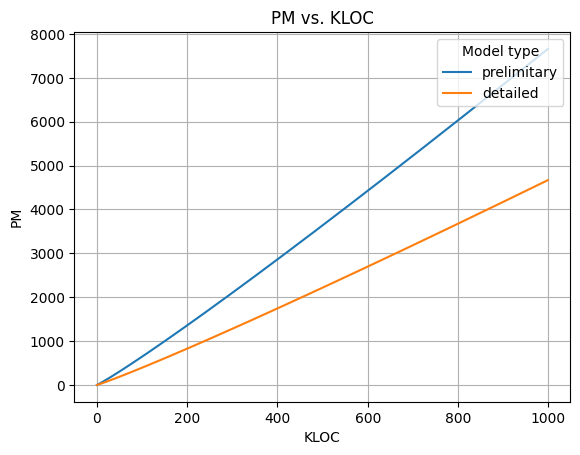

In [15]:
plot_graphs(prelimitary_pm_array, detailed_pm_array, klocs, 'PM')

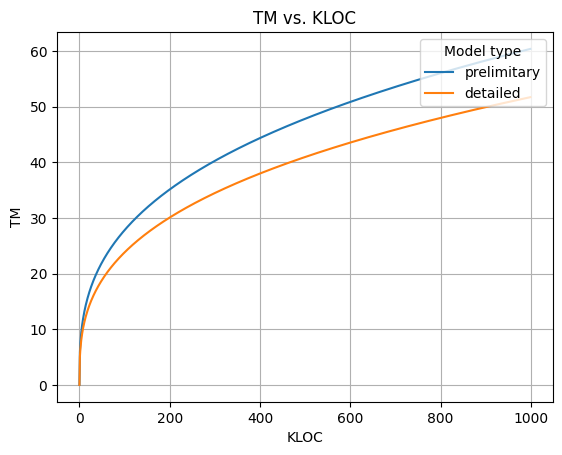

In [16]:
plot_graphs(prelimitary_tm_array, detailed_tm_array, klocs, 'TM')